# Fundamentals of Data Analysis

## Project 2020

In this project perform and explain simple linear regression using Python
on the powerproduction dataset available on Moodle. The goal is to accurately predict wind turbine power output from wind speed values using the data set as a basis.

For enhancement, compare simple linear regression to
other types of regression on this data set

### Project Plan

1. Upload the dataset.
2. Import required libaries for the notebook
3. Intial look at the datset, pandas.describe(), distribution of data, np.random.normal
4. scatterplot of the data using seaborn
5. Explore https://scikit-learn.org/stable/supervised_learning.html#supervised-learning 
6. Understand maybe 5 types of regression on this dataset.
7. Research types of regression that might be suitable - idea of curve/line post initial look at dataset.
8. Regression Vids Tutorials for better understanding:
 - https://www.youtube.com/user/zedstatistics
 - https://en.wikipedia.org/wiki/Regression_analysis
 - https://www.statisticshowto.com/probability-and-statistics/regression-analysis/
 - https://www.sciencedirect.com/topics/medicine-and-dentistry/regression-analysis
9. Plots to describe each regression type
10. subplots for comparison
11. tables for comparison


### Importing Python Libaries

In [1]:
#pandas
import pandas as pd

#numpy
import numpy as np

#matplotlib
import matplotlib.pyplot as plt

#seaborn
import seaborn as sns

In [2]:
#style of plot to be used
plt.style.use("ggplot")

#plot sizes
plt.rcParams['figure.figsize'] = [24, 20]

In [3]:
#reading in the dataset
df = pd.read_csv('powerproduction.txt')

In [4]:
#data types
df.dtypes

speed    float64
power    float64
dtype: object

The dataset is made up entirely of floating type real numbers.

In [5]:
#summary statistics
df.describe()

,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


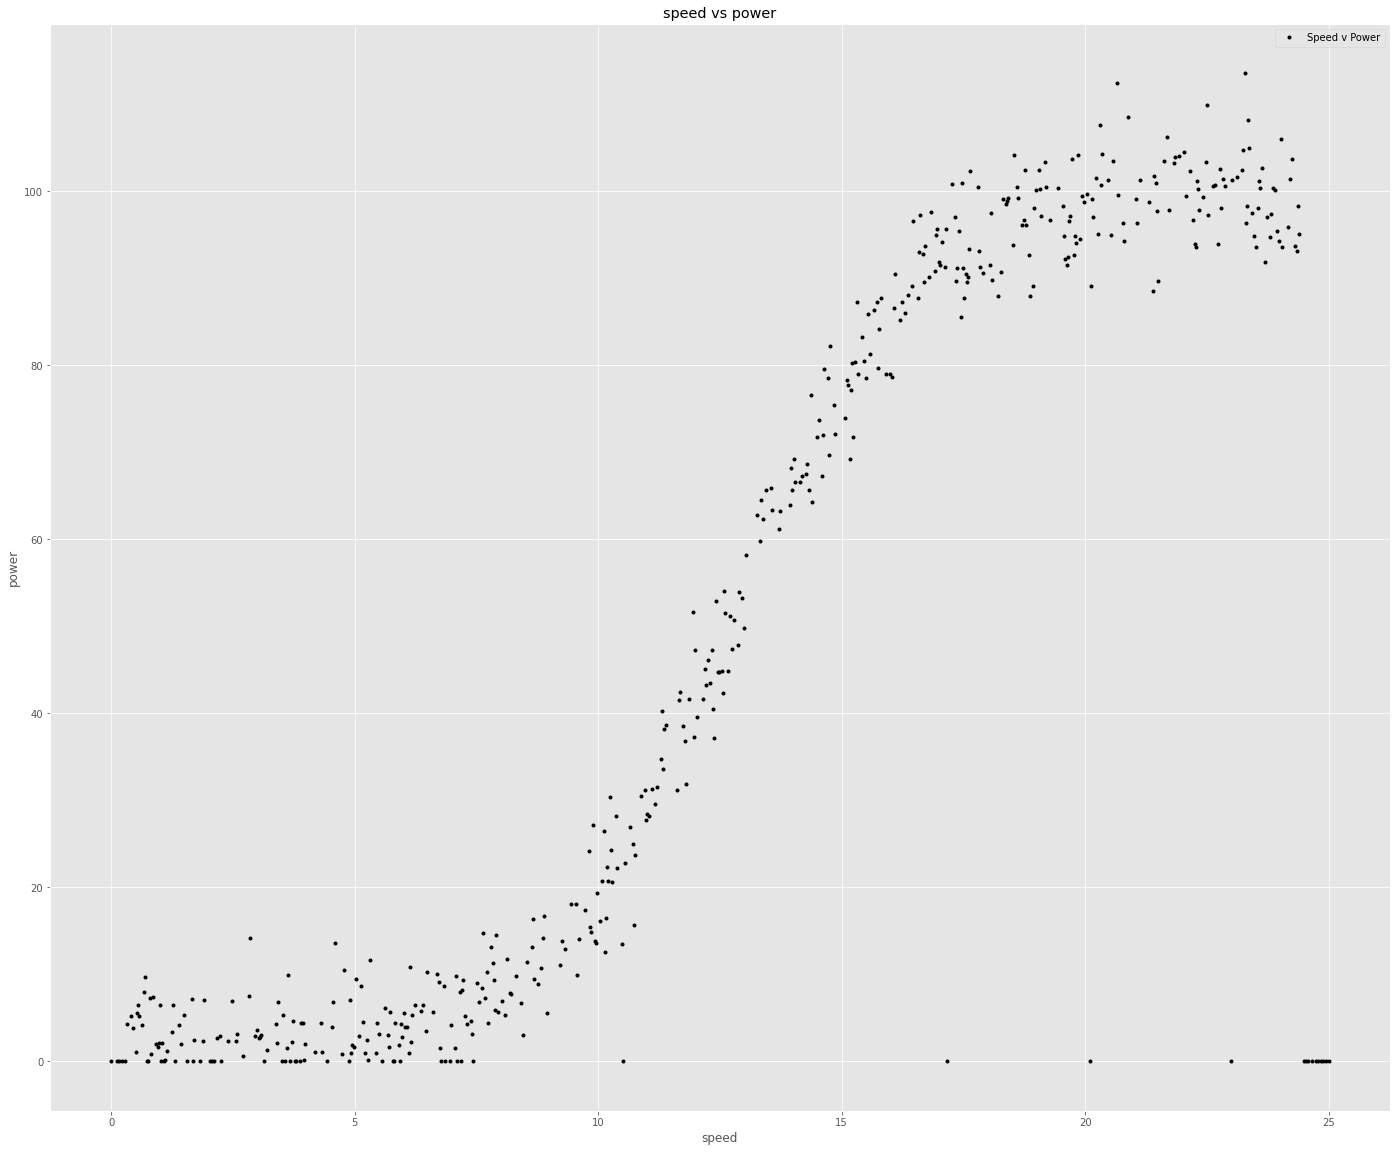

In [6]:
#plotting the dataset
plt.plot(df['speed'],df['power'],'.',color='black',label = 'Speed v Power')
plt.title(f'{df.columns[0]} vs {df.columns[1]}')
plt.xlabel(f'{df.columns[0]}')
plt.ylabel(f'{df.columns[1]}')
plt.legend();

Looking at the relationship between speed and power we can see that when the speed gets above 10, the power begins to increase sharply but flattens out again once the speed reaches approx 17.5. 

There are also a number of zero values for power when speed is greater than zero. We may view theswe as outliers, incorrect measurements or some anomoly in the data. We will fit a line with and without these values and look at the comparison.

The relationship between speed and power shows a curve or *s shape* pattern. This suggests we should investigate different degrees values when fitting our best fit line.

### Simple Linear Regression with Numpy Polyfit all values

$ y = mx + c $

The number $m$ is the slope if the line. The slope is how much $y$ increases by when $x$ is increased by 1.0. The $c$ is the y-intercept of the line. It is the value of $y$ when $x$ is at zero.

Using the numpy polyfit function we can identify the coefficents or the $m$ and the $c$. For a staright line we will pass *1* as the degree to create a straight line. Later we will look at applying different degrees to prehaps get a better overall fit.

A simple linear regression estimates the relationship between the values. In the dataset this is speed and power. Performing a linear regression on this dataset we can identify how strong the relationship is between these two variables. Power is *dependent* on Speed *(independent)*. 



In [7]:
#power and speed values as variables
speed = df['speed']
power = df['power']

#polyfit function, identifiying coeffieients
coeffs= np.polyfit(speed,power,1)

#### Function for prediction

Using the coefficients from the polyfit function, we will create a simple predict function.

In [8]:
#function to use coefficents to predict values
def predict_m1(x):
    pred = coeffs[0] *+ x + coeffs[1]
    return pred

***

### Model Accuaracy Indicactors

#### Coefficient of determination

ref https://blog.minitab.com/blog/adventures-in-statistics-2/regression-analysis-how-do-i-interpret-r-squared-and-assess-the-goodness-of-fit

$$ R^2 = 1 - \frac{\sum_i (y_i - m x_i - c)^2}{\sum_i (y_i - \bar{y})^2} $$

The R-squared is a statistical measure of how close the data are to the fitted regression line. It is also known as the coefficient of determination, or the coefficient of multiple determination for multiple regression.

The definition of R-squared is the percentage of the response variable variation that is explained by a linear model. In general the higher the value the better the model fits the data.

The R-squared values range from 0 to 1 and are repesneted by percentages. It really only works  with one explanatory variable.

In [9]:
#calculating R-squared value for the dataset
rsq = np.corrcoef(power,speed)[0][1]**2

#### Root Mean Squared Error

https://towardsdatascience.com/what-are-the-best-metrics-to-evaluate-your-regression-model-418ca481755b

$MSE=\frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2$

MSE is calculated by taking the average of the square of the difference between the original and predicted values of the data. It gives an absolute number on how much the predicted results deviate from the actual number. Not many insights can be interpreted from one single result but it gives a real number to compare against other model results in helping to select the best regression model.

$RMSE=\sqrt{MSE}$

RMSE is the standard deviation of the errors which occur when a prediction is made on a dataset. This is the same as MSE (Mean Squared Error) but the root of the value is considered while determining the accuracy of the model. It indicates the absolute fit of the model to the data–how close the observed data points are to the model’s predicted values. Whereas R-squared is a relative measure of fit, RMSE is an absolute measure of fit.

The lower the RMSE value means an indication of a better model fit.

In [10]:
#calculating the Root Mnean Squared Error
rmse = np.sqrt((np.sum((predict_m1(speed) - power)**2))/len(power))

### Cost Function

ref https://towardsdatascience.com/machine-learning-fundamentals-via-linear-regression-41a5d11f5220

$$ \sum_i (y_i - mx_i - c)^2 $$

The cost function when applying the coffeficents identified by the polyfit function is the mean of the squared differences between predicted y and actual y (i.e. the residuals). The lower the cost means more accuracy in the model.

In [11]:
#caluclating cost 
#ref https://github.com/ianmcloughlin/jupyter-teaching-notebooks/blob/master/simple-linear-regression.ipynb
cost1 = lambda m,c: np.sum([(power[i] - coeffs[0] * speed[i] - coeffs[1])**2 for i in range(speed.size)])
c1 = cost1(coeffs[0],coeffs[1])

#### plotting best fit line

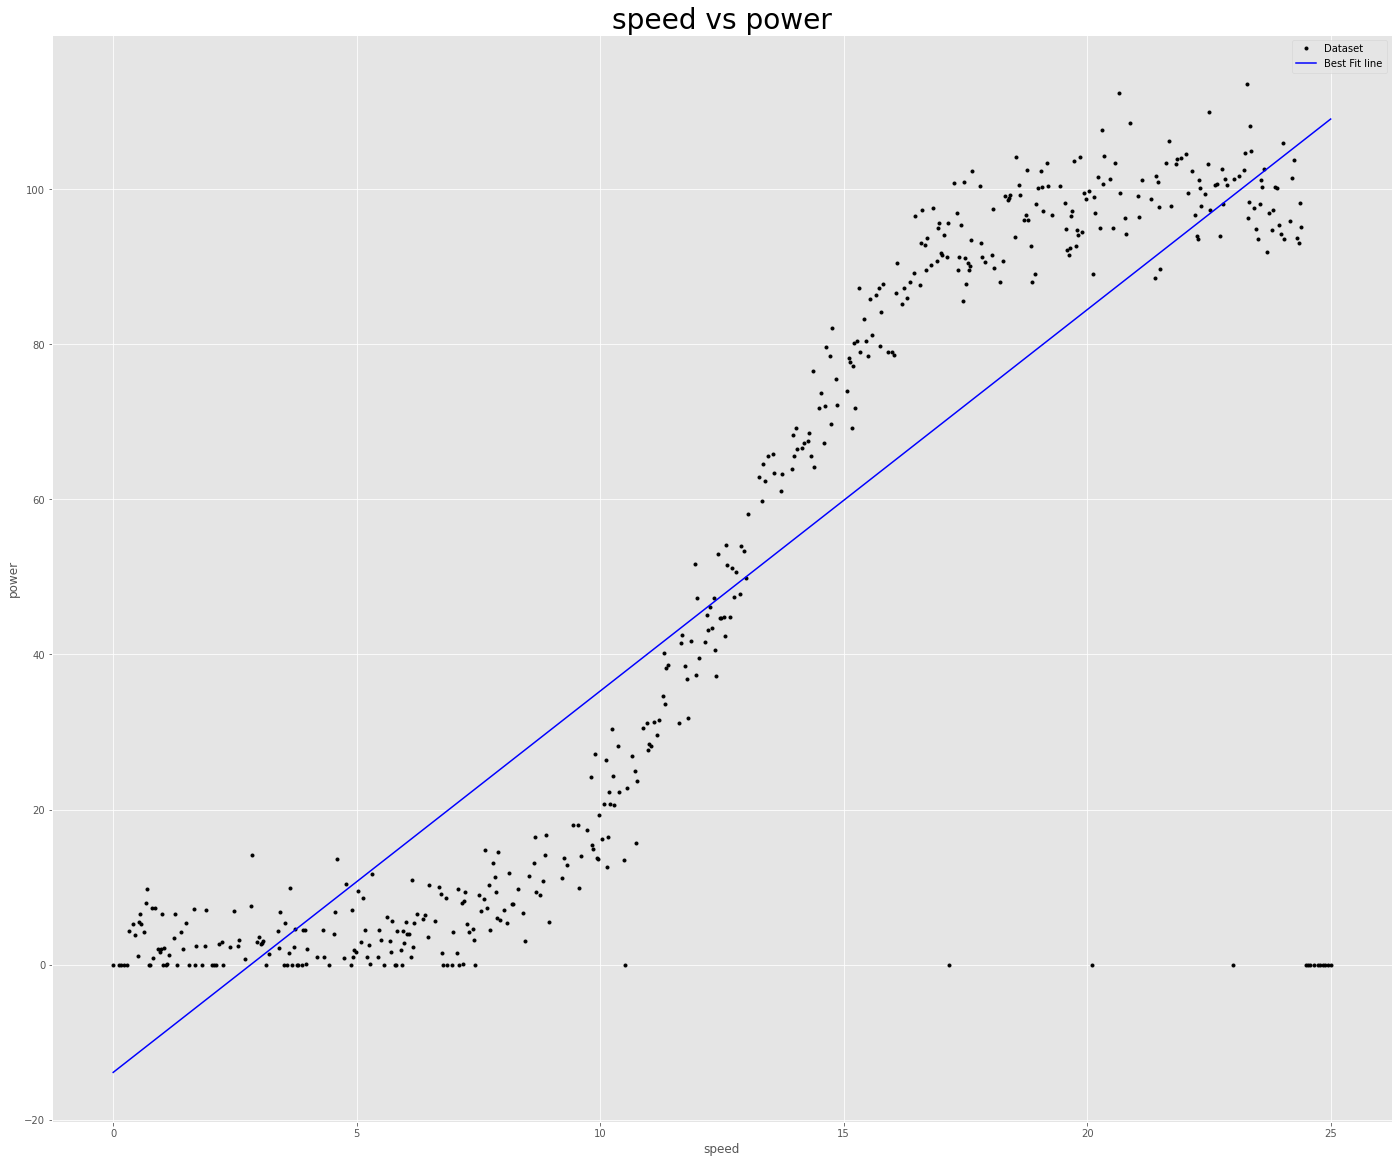

In [12]:
plt.plot(df['speed'],df['power'],'.',color='black',label = 'Dataset')
plt.title(f'{df.columns[0]} vs {df.columns[1]}',fontsize=28)
plt.xlabel(f'{df.columns[0]}')
plt.ylabel(f'{df.columns[1]}')

#plotting coeffeicent values
plt.plot(speed,coeffs[0] *speed + coeffs[1],color='blue',label = 'Best Fit line')
plt.legend();

The R-squared vaue of .728 is a pretty decent fit for the model. From observing the above plot it is very noticable that a straight line does not fit the shape of the data. The outliers for power when speed is greater than zero also effect the model accuaracy and rmse score. 

In [13]:
#print off of 3 regression accuracy indicators 
print("The R-squared value is %6.4f" % rsq)
print("The Root Mean Squared error value is %6.4f" % rmse)
print("Cost with m = %5.2f and c = %5.2f: %8.2f" % (coeffs[0],coeffs[1], cost1(coeffs[0],coeffs[1])))

The R-squared value is 0.7289
The Root Mean Squared error value is 21.6445
Cost with m =  4.92 and c = -13.90: 234241.16


### Simple Linear Regression with Numpy Polyfit removing zero values for power

In the next regression model, all values where power is at zero have been removed.

In [14]:
#new dataframe removing zeros
df2 = df[df['power']!=0].reset_index()

In [15]:
#power and speed values as variable
power2 = df2['power']
speed2 = df2['speed']

#polyfit function, identifiying coeffieients
coeffs2= np.polyfit(speed2,power2,1)

In [16]:
#predict function
def predict_m2(x):
    return coeffs2[0] *+ x + coeffs2[1]

In [17]:
#calculating R-squared value for the dataset
rsq2 = np.corrcoef(power2,speed2)[0][1]**2

#caluclating rmse
rmse2 = np.sqrt((np.sum((predict_m2(speed2) - power2)**2))/len(power2))

#calculating cost
cost2 = lambda m,c: np.sum([(power2[i] - coeffs2[0] * speed2[i] - coeffs2[1])**2 for i in range(speed2.size)])

#cost variable for barplot
c2 = cost2(coeffs2[0],coeffs2[1])

#### Plotting best fit line

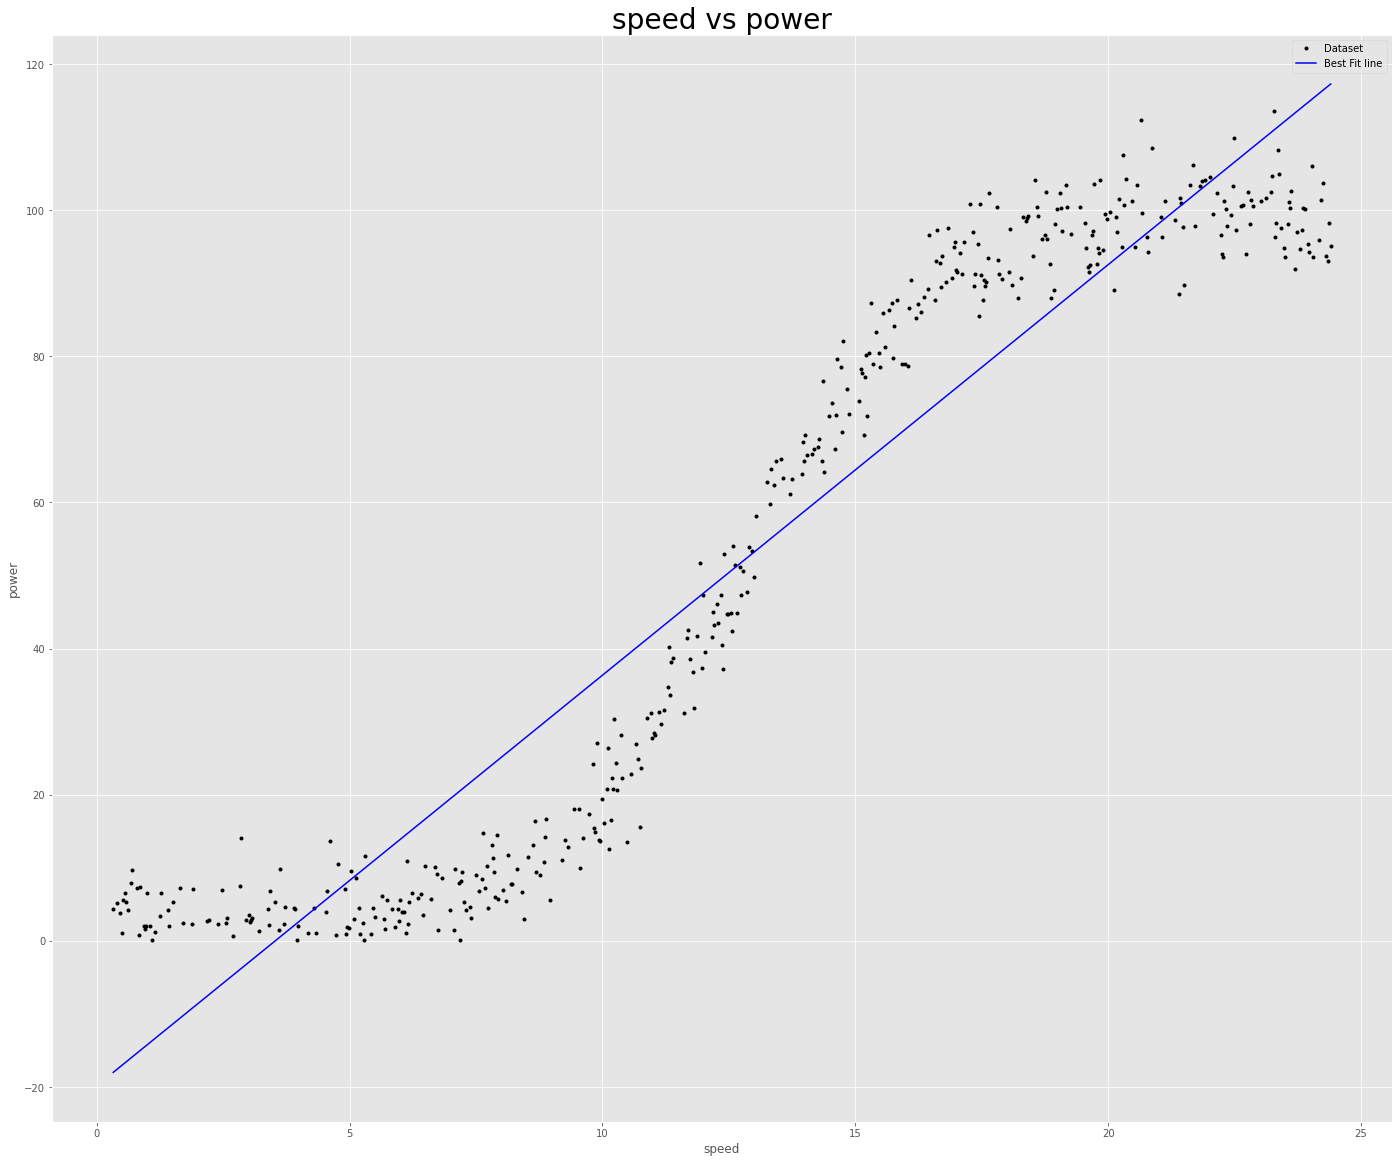

In [48]:
plt.plot(df2['speed'],df2['power'],'.',color='black',label='Dataset')
plt.title(f'{df.columns[0]} vs {df.columns[1]}',fontsize=28)
plt.xlabel(f'{df.columns[0]}')
plt.ylabel(f'{df.columns[1]}')

#plotting coeffeicent values
plt.plot(df2['speed'],coeffs2[0] *df2['speed'] + coeffs2[1],color='blue',label = 'Best Fit line')
plt.legend();

The R-squared vaue of .8985 is a much better fit than the original model with all the data. Also by removing the zero values for power, the rmse has halfed and the cost is also significantly reduced.

Getting a better understanding of the data in terms of its collection, possible anomolies etc. would inticate whether to remove these outliers or not.

In [49]:
print("The R-squared value is %6.4f" % rsq2)
print("The Root Mean Squared error value is %6.4f" % rmse2)
print("Cost with m = %5.2f and c = %5.2f: %8.2f" % (coeffs2[0],coeffs2[1], cost2(coeffs2[0],coeffs2[1])))

The R-squared value is 0.8985
The Root Mean Squared error value is 12.8967
Cost with m =  5.62 and c = -19.84: 75012.39


### Simple Linear Regression SK Learn

Using pythons SK Learn package we will do a further regression analysis on the data and compare results using numpys polyfit.A regression will be run on the dataset with outliers removed. Another regression will be ran on the same dataset by splitting the data into test and training data.

In [225]:
#importing sklean linear regression
#ref https://stackabuse.com/linear-regression-in-python-with-scikit-learn/
import sklearn.linear_model as lin

#importing skleanr metrics
#ref https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics
from sklearn.metrics import mean_squared_error, r2_score

#speed values to numpy array
x = speed2.to_numpy()

#power values to numpy array
y = power2.to_numpy()

#reshaping ref lecture notes
x = x.reshape(-1,1)

#variable for model type
model = lin.LinearRegression()

#fitting data to the model
model.fit(x, y)

#variable for coefficients
coeffs3 = [model.coef_[0],model.intercept_]

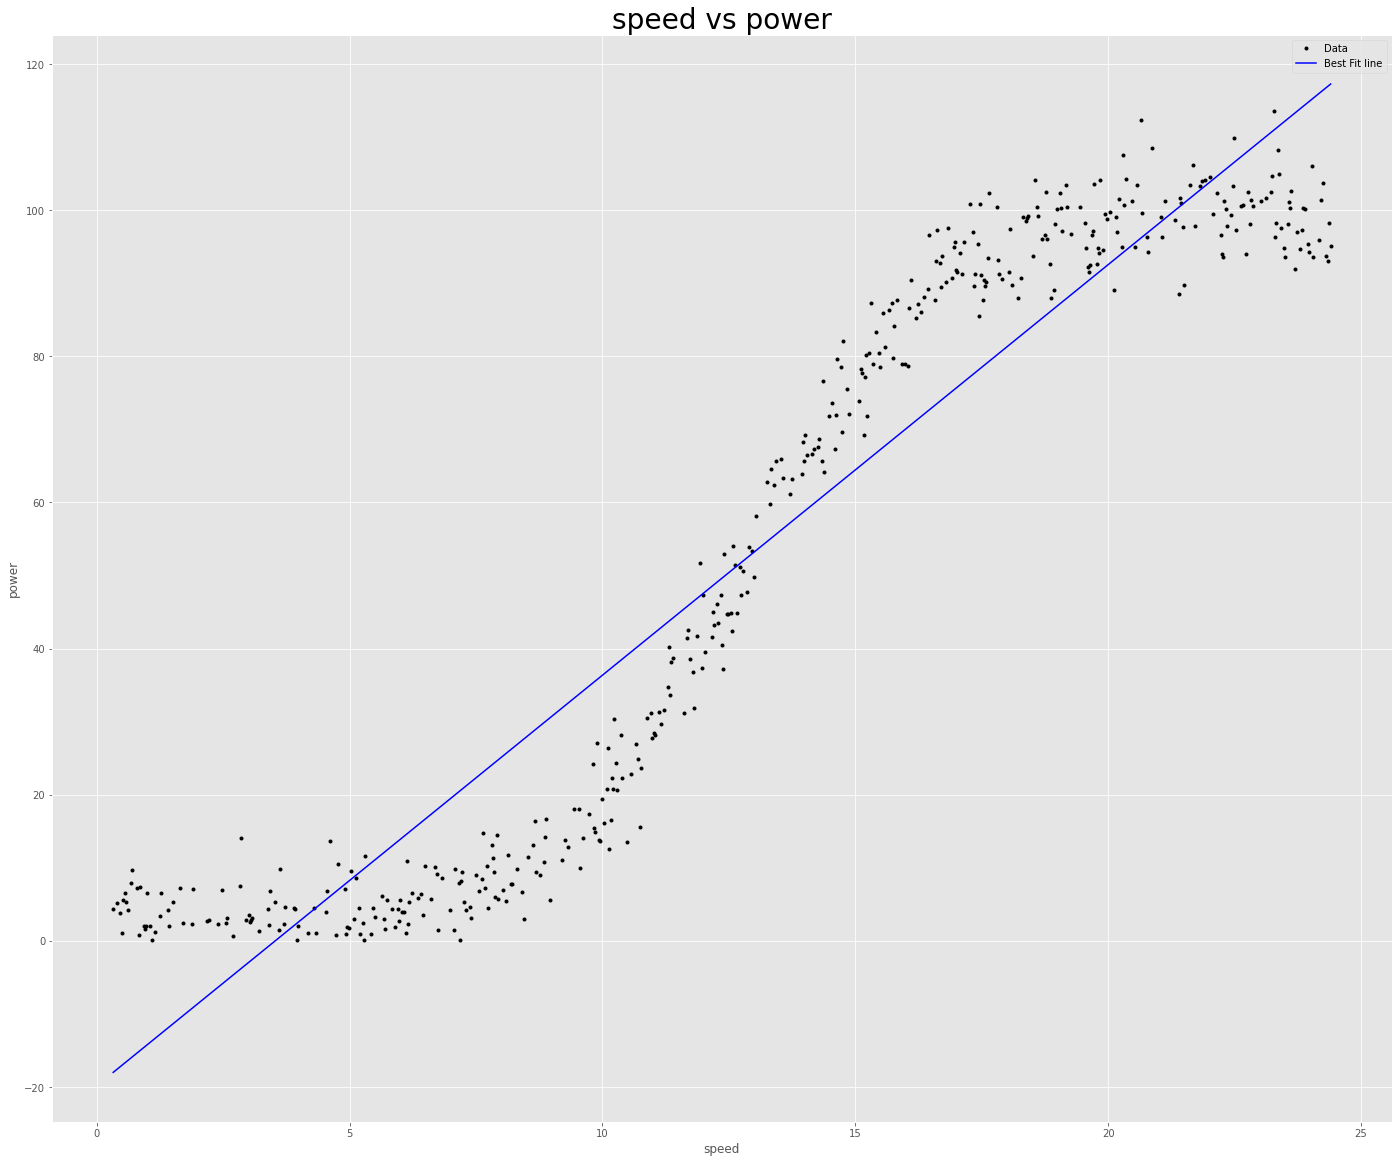

In [226]:
#plotting best fit line
plt.plot(speed2,power2,'.',color='black',label='Data')
plt.title(f'{df.columns[0]} vs {df.columns[1]}',fontsize=28)
plt.xlabel(f'{df.columns[0]}')
plt.ylabel(f'{df.columns[1]}')

#plotting coeffeicent values
plt.plot(speed2,coeffs3[0] *speed2 + coeffs3[1],color='blue',label = 'Best Fit line')
plt.legend();

In [227]:
def predict_m3(x):
    return coeffs3[0] *+ x + coeffs3[1]

In [228]:
#calculating rmse
rmse3 = np.sqrt(mean_squared_error(y,predict_m3(x)))

#calculating R-squared
rsq3 = r2_score(y,predict_m3(x),)  

#calucating cost
cost3 = lambda m,c: np.sum([(y[i] - coeffs3[0] * x[i] - coeffs3[1])**2 for i in range(y.size)])
c3 = cost3(coeffs3[0],coeffs3[1])

In [229]:
print("The R-squared value is %6.4f" % rsq3)
print("The Root Mean Squared error value is %6.4f" % rmse3)
print("Cost with m = %5.2f and c = %5.2f: %8.2f" % (coeffs3[0],coeffs3[1], cost3(coeffs3[0],coeffs3[1])))

The R-squared value is 0.8985
The Root Mean Squared error value is 12.8967
Cost with m =  5.62 and c = -19.84: 75012.39


#### Splitting into test and training data

In [285]:
#importing train test split functionality
from sklearn.model_selection import train_test_split

#splitting the data taking 33% of the data as the test size
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=0)

#variable for model type
model2 = lin.LinearRegression()

##fitting data to the model
model2.fit(X_train, y_train)

#variable for coefficients
coeffs4 = [model2.coef_[0],model.intercept_]

[5.797533295358488, -19.837685452108396]

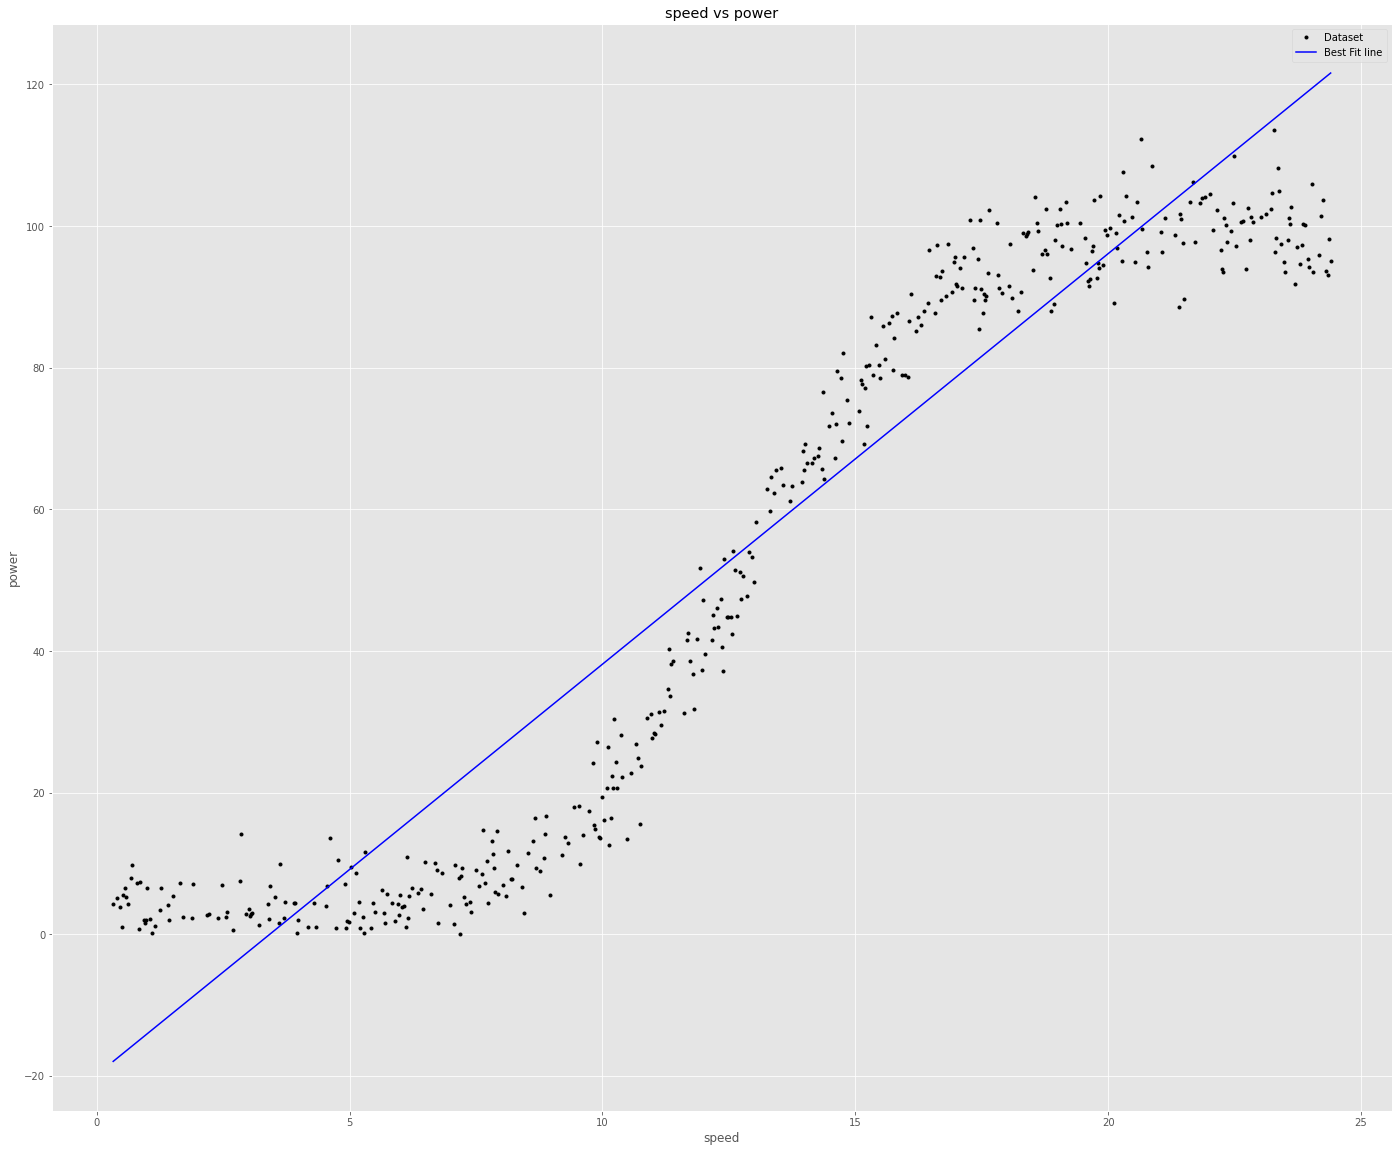

In [231]:
plt.plot(speed2,power2,'.',color='black',label = 'Dataset')
plt.title(f'{df.columns[0]} vs {df.columns[1]}')
plt.xlabel(f'{df.columns[0]}')
plt.ylabel(f'{df.columns[1]}')

#plotting coeffeicent values
plt.plot(speed2,coeffs4[0] *speed2 + coeffs4[1],color='blue',label = 'Best Fit line')
plt.legend();

In [232]:
def predict_m4(x):
    return coeffs4[0] *+ x + coeffs4[1]

In [233]:
#rmse
rmse4 = np.sqrt(mean_squared_error(y_train,predict_m4(X_train)))

#R-squared
rsq4 = r2_score(y_train,predict_m4(X_train) ) 

#cost
cost4 = lambda m,c: np.sum([(y_train[i] - coeffs4[0] * X_train[i] - coeffs4[1])**2 for i in range(y_train.size)])
c4 = cost4(coeffs4[0],coeffs4[1])

In [234]:
print("The R-squared value is %6.4f" % rsq4)
print("The Root Mean Squared error value is %6.4f" % rmse4)
print("Cost with m = %5.2f and c = %5.2f: %8.2f" % (coeffs4[0],coeffs4[1], cost4(coeffs4[0],coeffs4[1])))

The R-squared value is 0.9018
The Root Mean Squared error value is 12.7321
Cost with m =  5.80 and c = -19.84: 48956.35


#### Comparision Dataframe of models

We can compare the difference in the R-squared value and cost value between model 1 (all the data) and model 2 (zero values for power removed)

In [235]:
#ref https://stackoverflow.com/questions/16597265/appending-to-an-empty-dataframe-in-pandas
compare_df = pd.DataFrame(columns = ['R-squared', 'Cost','RMSE'])

In [236]:
compare_df = compare_df.append({'R-squared':rsq,'Cost':c1,'RMSE':rmse,'Model':'All Data'},ignore_index=True)
compare_df = compare_df.append({'R-squared':rsq2,'Cost':c2,'RMSE':rmse2,'Model':'Outliers Removed'},ignore_index=True)
compare_df = compare_df.append({'R-squared':rsq3,'Cost':c3,'RMSE':rmse3,'Model':'SK Learn Outliers Removed'},ignore_index=True)
compare_df = compare_df.append({'R-squared':rsq4,'Cost':c4,'RMSE':rmse4,'Model':'SK Learn Trained Data'},ignore_index=True)

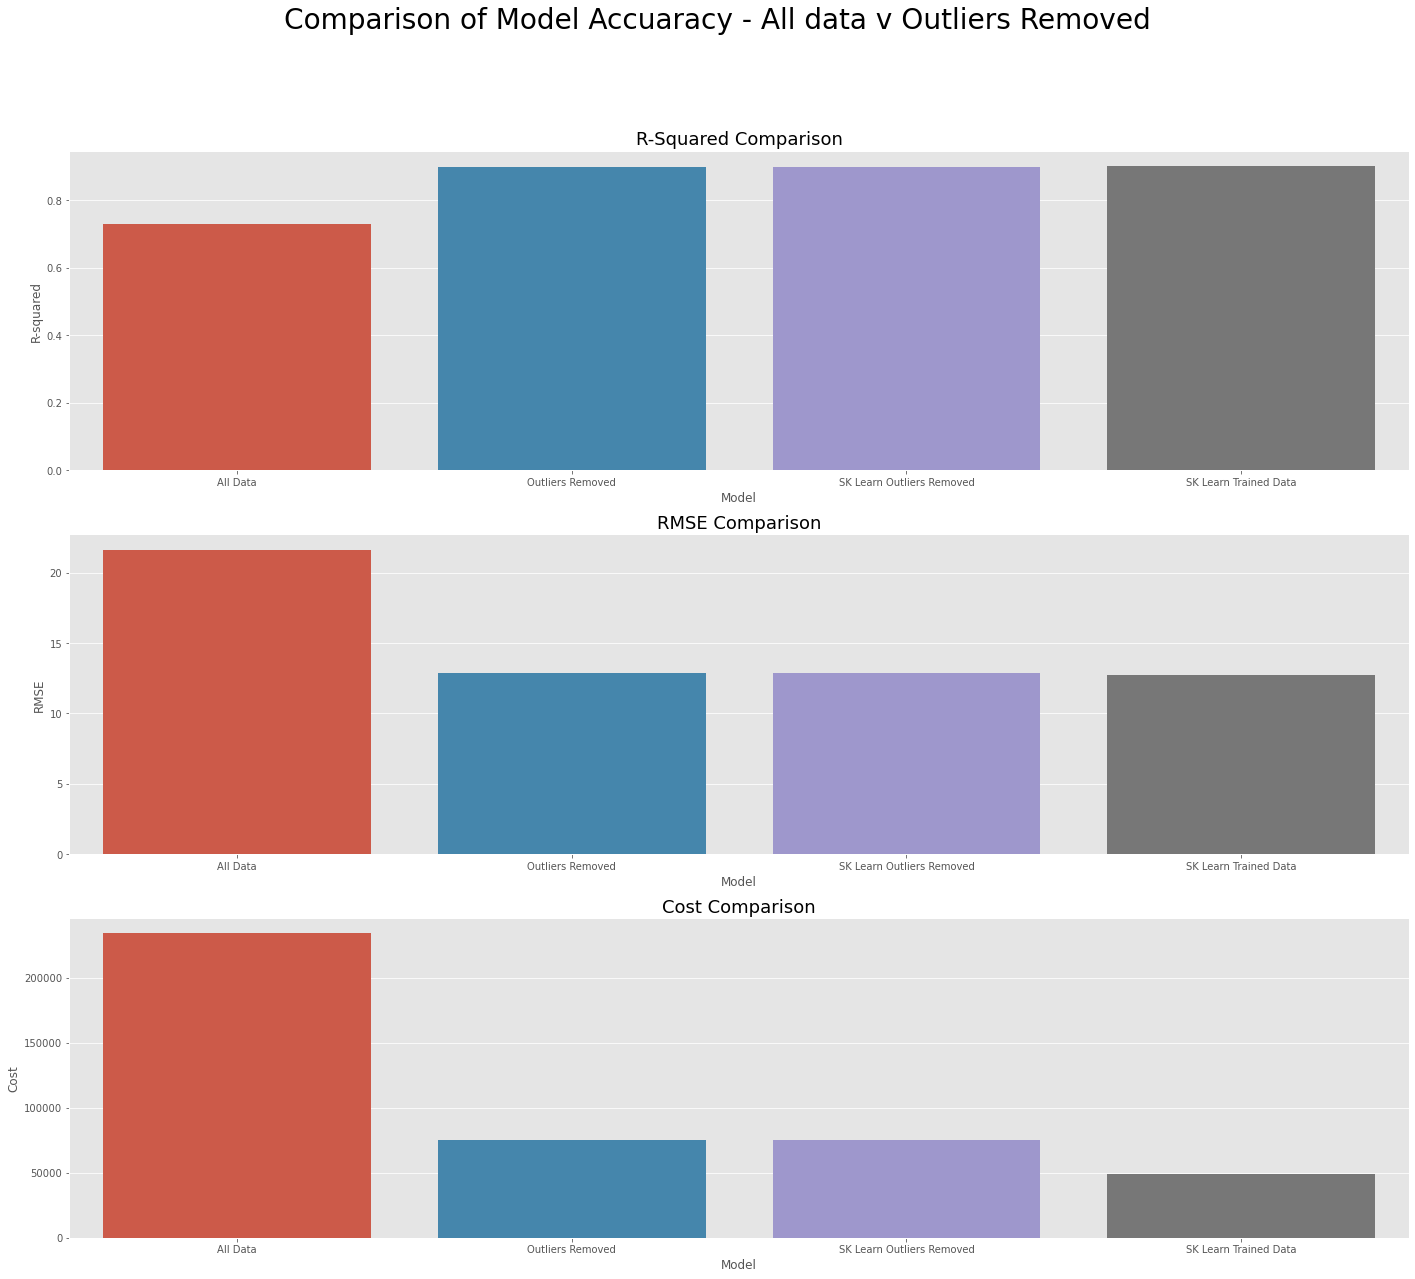

In [237]:
plt.suptitle('Comparison of Model Accuaracy - All data v Outliers Removed',fontsize=28)

plt.subplot(3,1,1)
sns.barplot(x='Model',data=compare_df,y='R-squared')
plt.title('R-Squared Comparison',fontsize=18)

plt.subplot(3,1,2)
sns.barplot(x='Model',data=compare_df,y='RMSE')
plt.title('RMSE Comparison',fontsize=18);

plt.subplot(3,1,3)
sns.barplot(x='Model',data=compare_df,y='Cost')
plt.title('Cost Comparison',fontsize=18);

There is no real difference between the resultsa we get from using numpy poltfit method and sklearn. However when using a model that splits the data into test and training dat, we see this reduces the cost compared to the other models based on the same dataset.

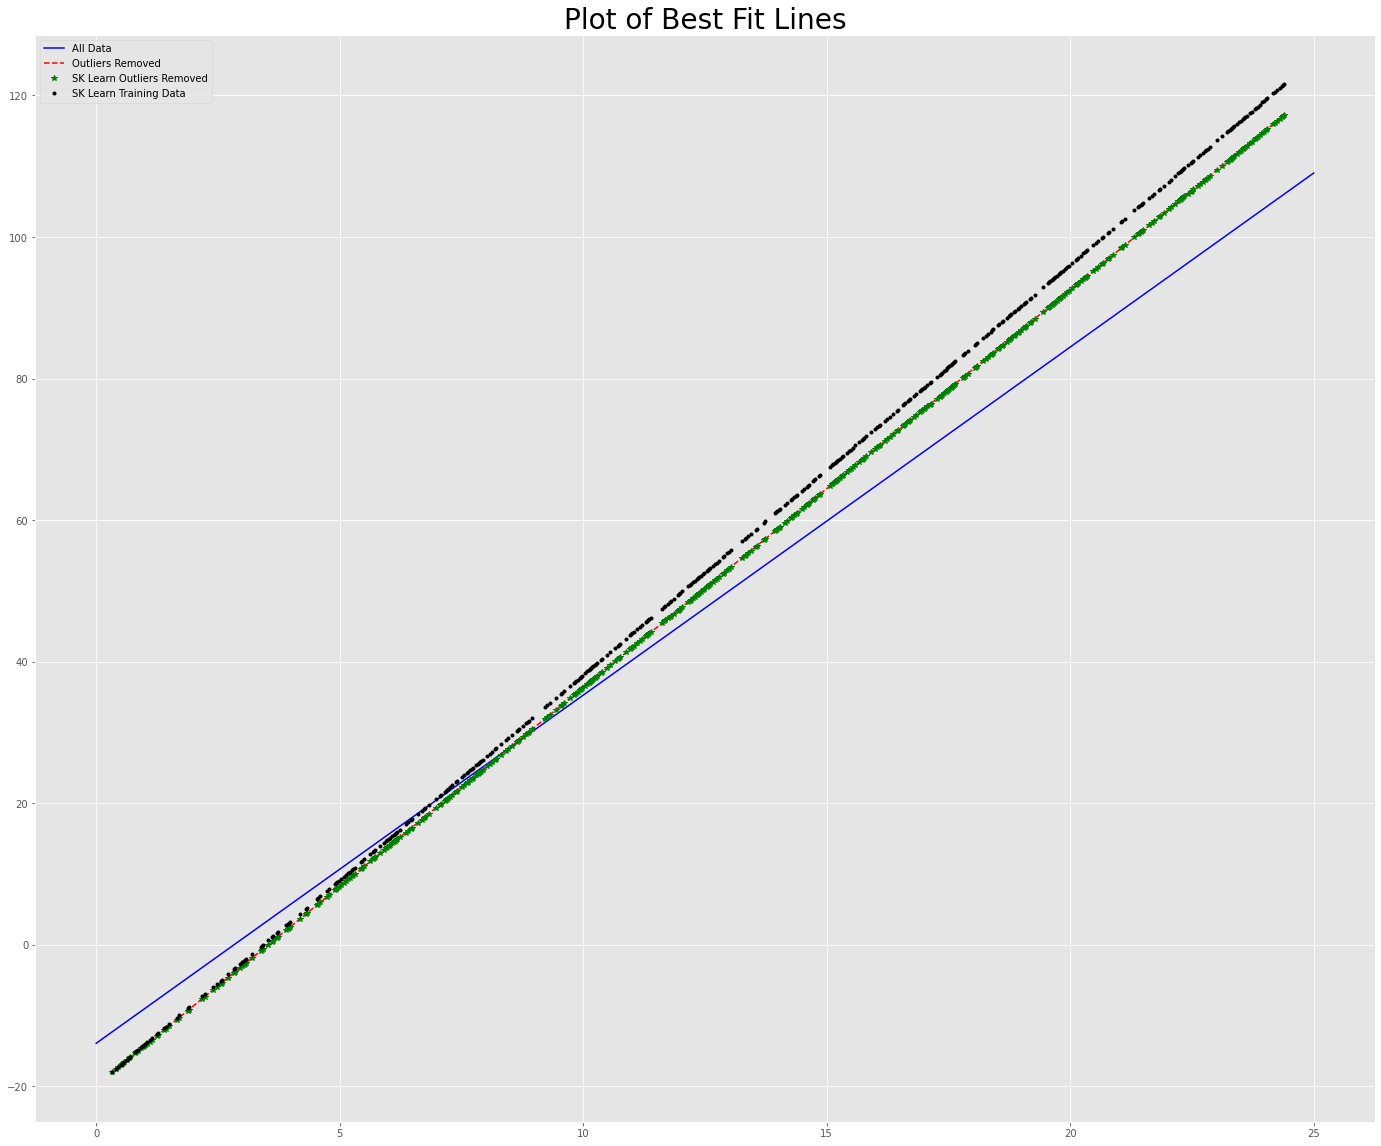

In [238]:
plt.title('Plot of Best Fit Lines',fontsize=28)
plt.plot(speed,coeffs[0] *speed + coeffs[1],color='blue',label = 'All Data')
plt.plot(speed2,coeffs2[0] *speed2 + coeffs2[1],'--',color='red',label = 'Outliers Removed')
plt.plot(speed2,coeffs3[0] *speed2 + coeffs2[1],'*',color='green',label = 'SK Learn Outliers Removed')
plt.plot(speed2,coeffs4[0] *speed2 + coeffs3[1],'.',color='black',label = 'SK Learn Training Data')
plt.legend();

#### Plot of each best fit line

The 4 best fit lines from each model are plotted below. We can observe that there is very little difference between the numpy polyfit method and sklearn method. Where we see a difference is when the data is split using sklearn. 

### Polynomial
Create a function to call multiple poly degrees

In [295]:
from numpy.polynomial.polynomial import Polynomial as poly

In [296]:
# ref https://developpaper.com/an-example-of-python-determining-the-order-of-polynomial-fitting-regression/
degrees = []

for degree in range(1,20):
    #pol = poly.fit(speed2,power2,degree)
    pol = poly.fit(speed2,power2,degree)
    y_test_polynomial = pol(speed2)
    # Append score.
    degrees.append((degree, r2_score(power2,y_test_polynomial), np.sqrt(mean_squared_error(power2,y_test_polynomial))))
    
degrees

[(1, 0.8984832870534454, 12.896688707698413),
 (2, 0.8991440466805407, 12.854648718361096),
 (3, 0.9783216723216328, 5.959671638433299),
 (4, 0.9790166581245356, 5.863362862429427),
 (5, 0.9879782627661894, 4.438058874744211),
 (6, 0.9879917220795591, 4.435573794909073),
 (7, 0.9899996009716129, 4.047791259637342),
 (8, 0.9900342358332404, 4.040775725248091),
 (9, 0.990132377795863, 4.020829896883089),
 (10, 0.990133158073223, 4.020670921169612),
 (11, 0.9901398399970832, 4.019309271355398),
 (12, 0.9901537917025379, 4.016464689245209),
 (13, 0.9901545733729307, 4.0163052566113935),
 (14, 0.9901747378258469, 4.012190244074779),
 (15, 0.9901936210505877, 4.008332864692178),
 (16, 0.9902195399360044, 4.003032220100596),
 (17, 0.9902269893721085, 4.001507444528088),
 (18, 0.9902576057926319, 3.9952346622857),
 (19, 0.9902642718316266, 3.993867598568389)]

In [298]:
pol = poly.fit(speed2, power2, 7)
#poly1 = pol(speed)
#len(poly1)

In [299]:
#plt.plot(speed,poly1)
#plt.plot(speed,power,'.')

degree = 1, RMSE = 12.896689 ,r2_score = 0.898
degree = 2, RMSE = 12.854649 ,r2_score = 0.899
degree = 3, RMSE = 5.959672 ,r2_score = 0.978
degree = 4, RMSE = 5.863363 ,r2_score = 0.979
degree = 5, RMSE = 4.438059 ,r2_score = 0.988
degree = 6, RMSE = 4.435574 ,r2_score = 0.988
degree = 7, RMSE = 4.047791 ,r2_score = 0.990
degree = 8, RMSE = 4.040776 ,r2_score = 0.990
degree = 9, RMSE = 4.020830 ,r2_score = 0.990
degree = 10, RMSE = 4.020672 ,r2_score = 0.990
degree = 11, RMSE = 4.019768 ,r2_score = 0.990
degree = 12, RMSE = 4.022384 ,r2_score = 0.990
degree = 13, RMSE = 4.024541 ,r2_score = 0.990
degree = 14, RMSE = 4.023590 ,r2_score = 0.990
degree = 15, RMSE = 4.021529 ,r2_score = 0.990
degree = 16, RMSE = 4.021758 ,r2_score = 0.990
degree = 17, RMSE = 4.082354 ,r2_score = 0.990
degree = 18, RMSE = 4.298807 ,r2_score = 0.989
degree = 19, RMSE = 4.759891 ,r2_score = 0.986
degree = 20, RMSE = 5.480810 ,r2_score = 0.982
degree = 21, RMSE = 6.407635 ,r2_score = 0.975
degree = 22, RMSE = 

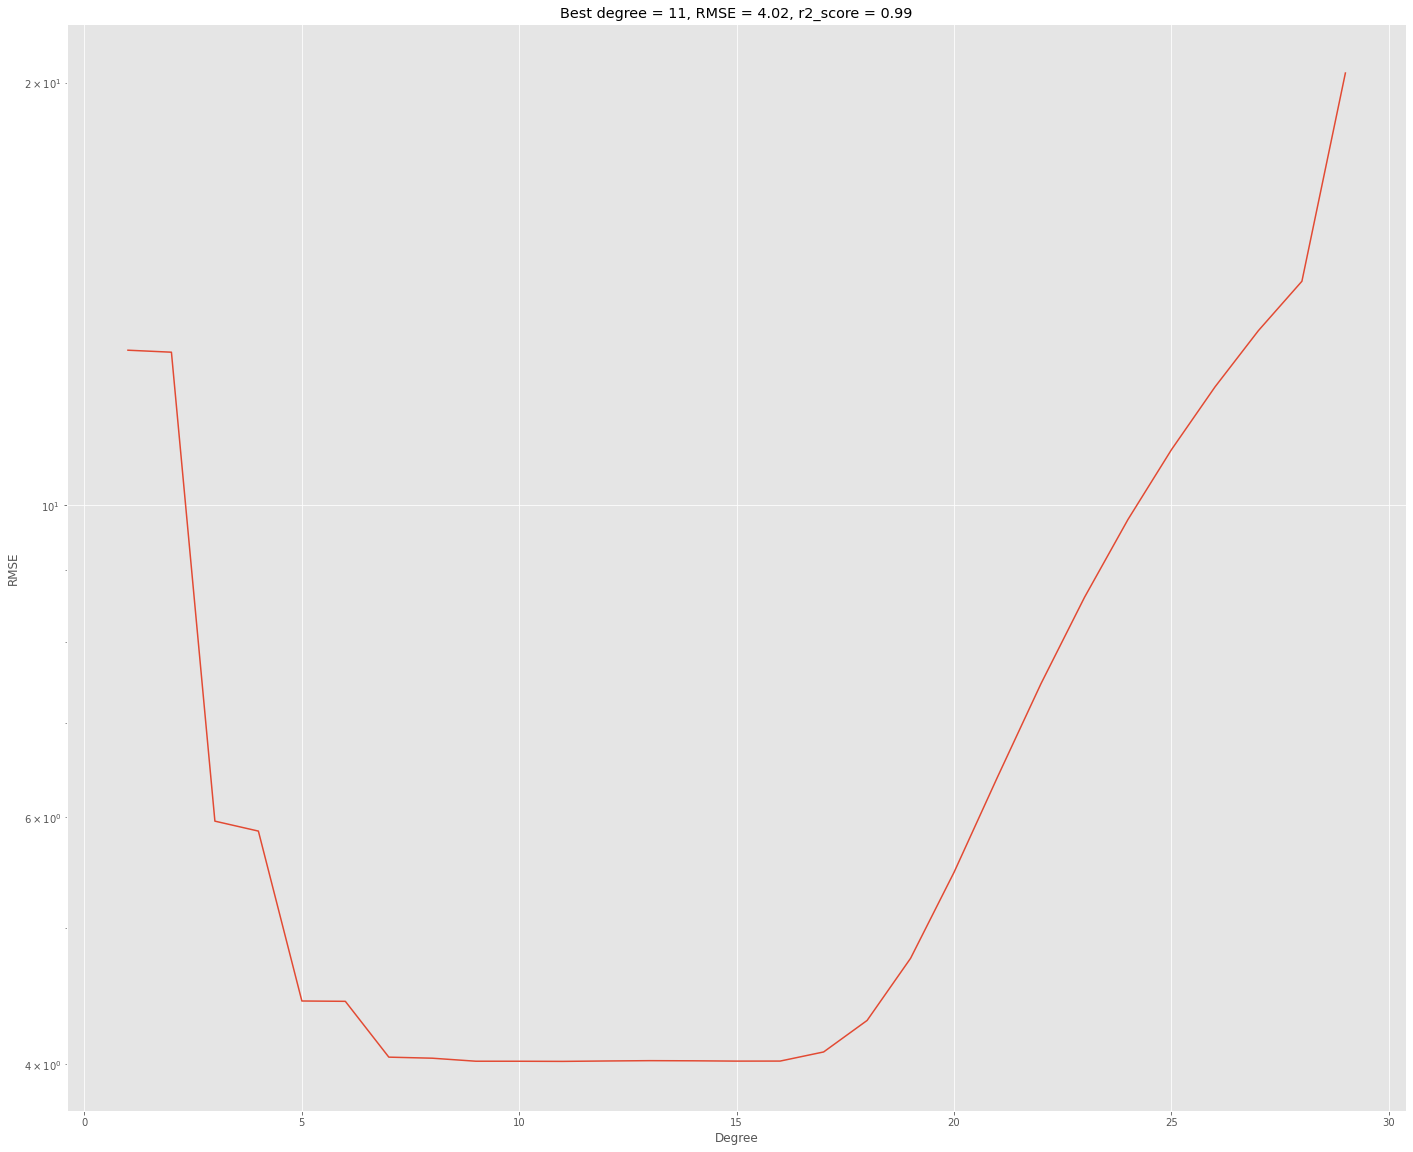

In [301]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


#X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=0)

rmses = []
degrees = np.arange(1, 30)
min_rmse, min_deg,score = 1e10, 0 ,0
 
for deg in degrees:
    # Generate a polynomial feature set (e.g., according to degree = 3, generate [[x, x** 2, x** 3])
    poly = PolynomialFeatures(degree=deg, include_bias=False)
    x_train_poly = poly.fit_transform(x)
 
    # Polynomial Fitting
    poly_reg = LinearRegression()
    poly_reg.fit(x_train_poly, y)
    # print (poly_reg.coef_, poly_reg.intercept_) coefficients and constants
    
    #Test Set Comparison
    x_test_poly = poly.fit_transform(x)
    y_test_pred = poly_reg.predict(x_test_poly)
    
    #Mean_squared_error (y_true, y_pred) # mean square error regression loss, the smaller the better.
    poly_rmse = np.sqrt(mean_squared_error(y, y_test_pred))
    rmses.append(poly_rmse)
    
    # In R2 range [0, 1], the closer R2 approaches 1, the better fitting.
    r2score = r2_score(y, y_test_pred)

    # degree cross validation
    if min_rmse > poly_rmse:
        min_rmse = poly_rmse
        min_deg = deg
        score = r2score
    print('degree = %s, RMSE = %.6f ,r2_score = %.3f' % (deg, poly_rmse,r2score))
    
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(degrees, rmses)
ax.set_yscale('log')
ax.set_xlabel('Degree')
ax.set_ylabel('RMSE')
ax.set_title('Best degree = %s, RMSE = %.2f, r2_score = %.2f' %(min_deg, min_rmse,score)) 
plt.show()

In [302]:
coeffs5 = np.polyfit(speed2, power2, 11)

In [303]:
for i in range(len(coeffs5)):
    print(coeffs5[i])

-2.1605738226517084e-10
2.994885512274072e-08
-1.773133909194104e-06
5.834354078490063e-05
-0.0011651527505684423
0.014556807375461275
-0.11463022722730913
0.5732107251968022
-1.8280072433742172
3.728792243792058
-4.515731481211069
6.300780131000415


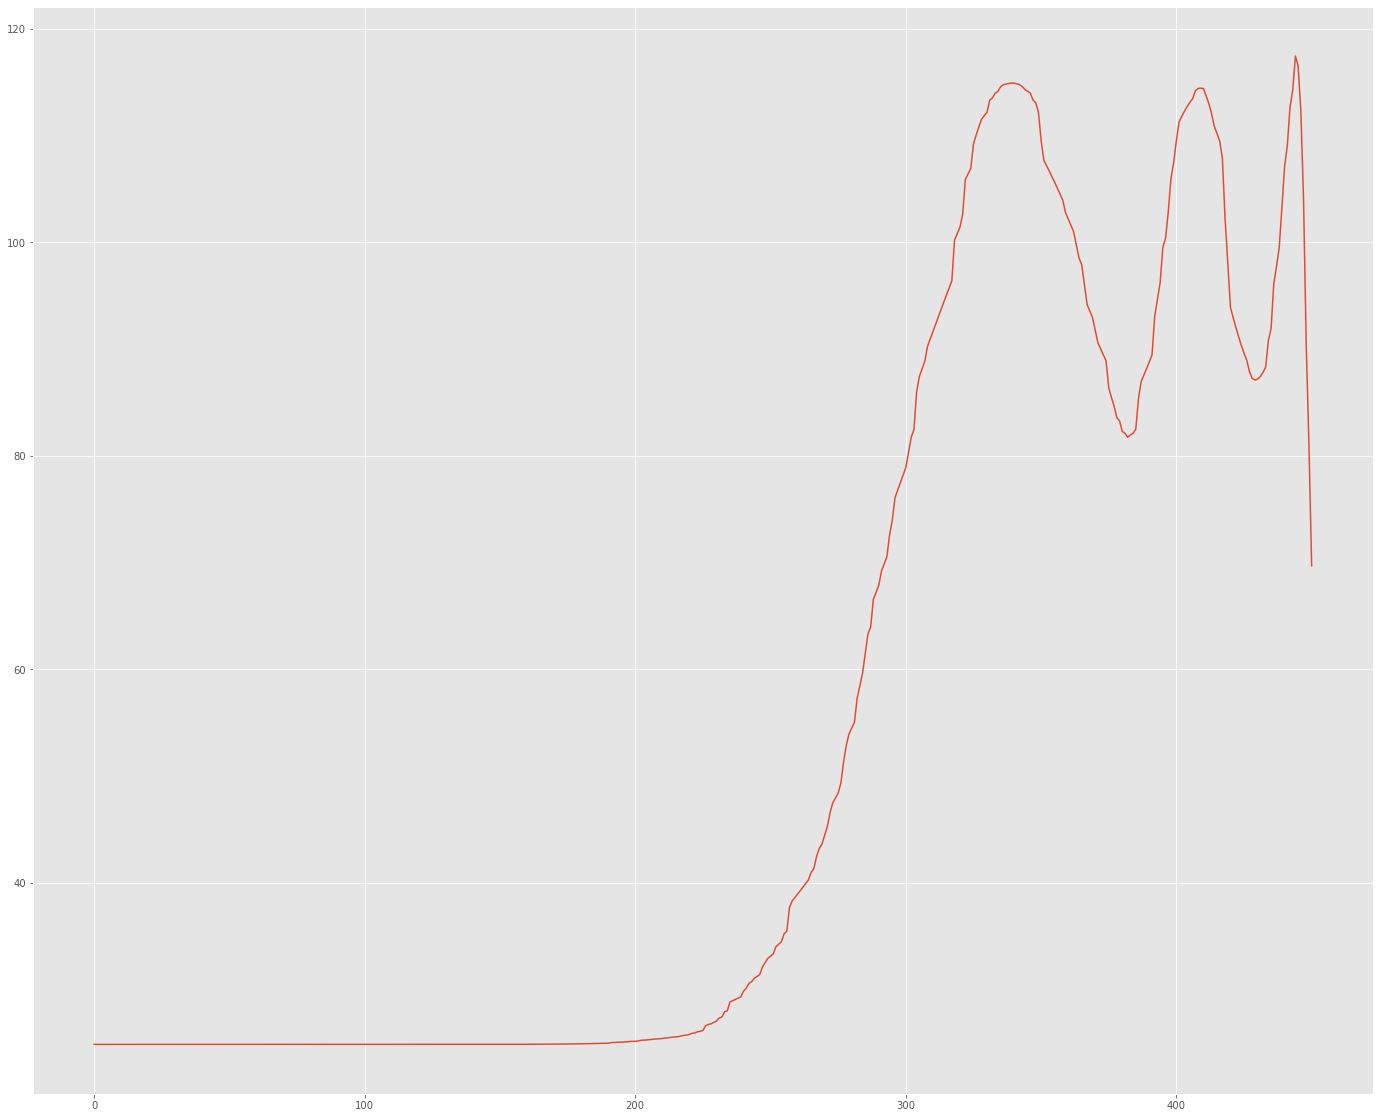

In [308]:
plt.plot(poly_reg.predict(poly.fit_transform(x)))